<a href="https://colab.research.google.com/github/abhisheksharma26/ML-practice/blob/master/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf

import numpy as np 

import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import datasets , layers, models

In [18]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()


In [12]:
X_train.shape

(60000, 28, 28)

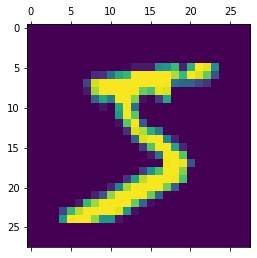

In [7]:
plt.matshow(X_train[0])


In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape


(60000, 784)

In [14]:
X_train_flattened[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7335 - accuracy: 0.8119
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.9138
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2850 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.9248
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9278


In [26]:

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 932us/step - loss: 0.2694 - accuracy: 0.9257


[0.2693733274936676, 0.9257000088691711]

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.1000465e-02, 6.0944592e-07, 5.6633353e-02, 9.6629167e-01,
       3.0644238e-03, 1.2203789e-01, 1.7018489e-06, 9.9985909e-01,
       9.9235654e-02, 7.9977262e-01], dtype=float32)

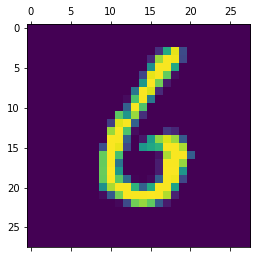

In [32]:
plt.matshow(X_test[50])

In [33]:
np.argmax(y_predicted[50])

6

In [34]:

y_predicted_labels= [np.argmax(i) for i in y_predicted]

In [36]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    9,    2,    1,    1],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   3,    9,  938,   16,    8,    3,   12,   10,   28,    5],
       [   1,    0,   19,  930,    0,   18,    2,   11,   13,   16],
       [   1,    2,    4,    1,  905,    0,   11,    5,    7,   46],
       [   8,    3,    3,   39,    9,  771,   18,    7,   25,    9],
       [   7,    3,    6,    1,    8,   10,  920,    2,    1,    0],
       [   1,    6,   22,    5,    8,    0,    0,  946,    1,   39],
       [   7,   12,   11,   25,    9,   31,   10,   12,  833,   24],
       [  11,    7,    1,    9,   20,    5,    0,   15,    4,  937]],
      dtype=int32)>

In [ ]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4557 - accuracy: 0.8719
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1326 - accuracy: 0.9611
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0880 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0498 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0394 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0312 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0215 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [57]:
X_train= X_train.reshape(-1,28,28,1)
X_train.shape
X_test= X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [54]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [55]:

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3188 - accuracy: 0.9029
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0477 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0130 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0088 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 45s 24m

In [58]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 3s 9ms/step - loss: 0.0399 - accuracy: 0.9903


[0.03987780585885048, 0.9902999997138977]

In [62]:



def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

y_test = y_test.reshape(-1,)


TypeError: ignored

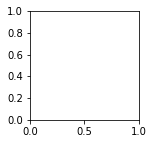

In [63]:
plot_sample(X_test, y_test , 1)

In [65]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

NameError: ignored

In [35]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]